Test data accuracy: 0.6009036144578314
Training data accuracy: 0.6085271317829457
Best hyperparameters: {'C': 1.0}
Precision: 0.6377885699916181
Recall: 0.60623869801085
F1 score: 0.5281893910502158
Confusion matrix for all data:
 [[ 540  881    0]
 [  70 2131    8]
 [  94  689   11]]


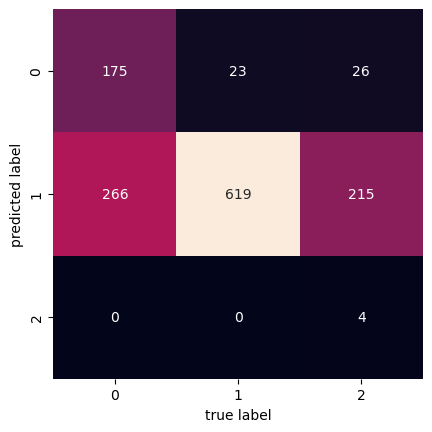

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
student_data = pd.read_csv("./dataset.csv")

# Remove redundant data rows
student_data = student_data.drop_duplicates()

# Remove rows with null values
student_data = student_data.dropna()



# Select the features and target
features = student_data.loc[:, ["Mother's occupation", "Father's occupation", "Debtor", "Tuition fees up to date", "Scholarship holder"]]
target = student_data.loc[:, "Target"]


# Convert target variable to numerical labels
target = pd.factorize(target)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define the hyperparameters to tune
params = {'C': np.logspace(-3, 3, num=7)}

# Train the logistic regression model using GridSearchCV for hyperparameter tuning
clf = GridSearchCV(LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs', max_iter=1000), params).fit(X_train, y_train)

# Test the model on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy score for test data
accuracy_test = accuracy_score(y_test, y_pred)

# Calculate the accuracy score for training data
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Concatenate the predicted target variables from the training and testing sets
y_pred_all = np.concatenate((y_pred_train, y_pred))

# Concatenate the true target variables from the training and testing sets
y_true_all = np.concatenate((y_train, y_test))

# Calculate the confusion matrix for all data
conf_matrix_all = confusion_matrix(y_true_all, y_pred_all)

# Calculate the precision, recall, f1 score for all data
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true_all, y_pred_all, average='weighted')

# Print the results
print("Test data accuracy:", accuracy_test)
print("Training data accuracy:", accuracy_train)
print("Best hyperparameters:", clf.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)
print("Confusion matrix for all data:\n", conf_matrix_all) 

# Displaying the results in a confusion matrix to identify where more data may be needed
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()
